In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

### News Title Sentiment Analysis
This section performs sentiment analysis on some news titles pulled from a kaggle dataset. I plot the distributions of absolute sentiment(use of strong positive or negative words). A potential hypothesis here would be that tabloid style media outlets would tend towards more extreme use of positive vs negative words.

In [3]:
#import the data into pandas
df = pd.read_csv("uci-news-aggregator.csv")

In [4]:
#Get the 10 most common publishers
pubs = df.PUBLISHER.value_counts()[0:5].index.to_list()
print(pubs)

['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']


In [103]:
#Plot the years articles are from
years = []
for i, date in enumerate(df["TIMESTAMP"]):
    #truncate last three because it is milliseconds
    date = int(str(date)[0:-3])
    time_tuple = time.gmtime(date)
    years.append(time_tuple.tm_year)
print(min(years))
print(max(years))

2014
2014


In [5]:
#Pull the articles from the top publishers
top_pubs_articles = df.loc[df['PUBLISHER'].isin(pubs)]
#Get a series of the titles
titles = top_pubs_articles["TITLE"]
titles_data = titles.array.to_numpy()

In [6]:
#Initialize vader
analyzer = SentimentIntensityAnalyzer()

In [7]:
#Run the vader polarity analysis on the titles
polarities = []
for title in titles_data:
    vs = analyzer.polarity_scores(title)
    polarities.append(vs)

In [8]:
# Get comound polarities
compound_polarities = [abs(pol['compound']) for pol in polarities]
# add this back to the top_pubs_articles dataframe
top_pubs_articles["polarity"] = compound_polarities

/home/alec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
#Show the distributions of polarities for Reuters, Huff post, LA Times
#get the polarities
polarities = {}
for publisher in pubs:
    polarities[publisher] = top_pubs_articles.loc[top_pubs_articles['PUBLISHER'] == publisher]['polarity'].values

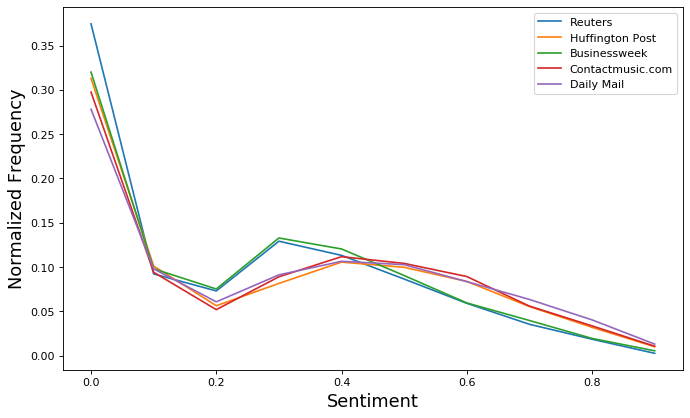

In [17]:
#plot the histograms
fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
for publisher in pubs:
    kde_weights = np.ones(len(polarities[publisher])) / len(polarities[publisher])
    density = stats.gaussian_kde(polarities[publisher])
    x = np.arange(0., 1, .1)
    plt.plot(x, density(x) * 0.1, label=publisher)

plt.legend(loc='upper right')
plt.xlabel("Sentiment", fontsize=16)
plt.ylabel("Normalized Frequency", fontsize=16)
plt.show()